# __Projekt_OS__

In [10]:
import pandas as pd
os = pd.read_csv("athlete_events.csv")
os.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


#### De sporter landet fått flest medaljer i

In [11]:
# Gruppera medaljerna efter sport och räkna antalet medaljer för varje sport
medals_by_sport =os.groupby(["Sport"]).size().reset_index(name="medals")

# Hitta sporterna med flest medaljer per sport
top_sports =medals_by_sport.loc[medals_by_sport.groupby("Sport")["medals"].idxmax()]

# Sortera i fallande ordning
sort = top_sports.nlargest(2000, "medals")
sort


,Sport,medals
5,Athletics,38624
27,Gymnastics,26707
54,Swimming,23195
47,Shooting,11448
19,Cycling,10859
...,...,...
40,Racquets,12
31,Jeu De Paume,11
42,Roque,4
9,Basque Pelota,2


#### Antal medaljer per OS

In [12]:

medals_per_OS = os.groupby("Games").size().reset_index(name="Medals")
medals_per_OS.head()


,Games,Medals
0,1896 Summer,380
1,1900 Summer,1936
2,1904 Summer,1301
3,1906 Summer,1733
4,1908 Summer,3101


#### Histogram över åldrar

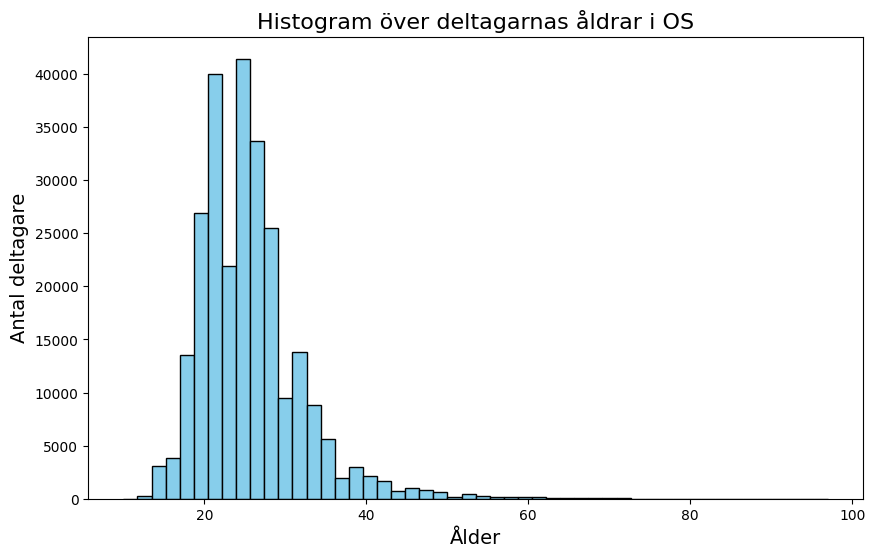

In [13]:
import matplotlib.pyplot as plt

# Skapa histogram för åldrarna
plt.figure(figsize=(10, 6))
plt.hist(os['Age'].dropna(), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram över deltagarnas åldrar i OS', fontsize=16)
plt.xlabel('Ålder', fontsize=14)
plt.ylabel('Antal deltagare', fontsize=14)

plt.show()


### Skapa fler plots för att visualisera flera aspekter kring ert land och dess sportprestationer i OS

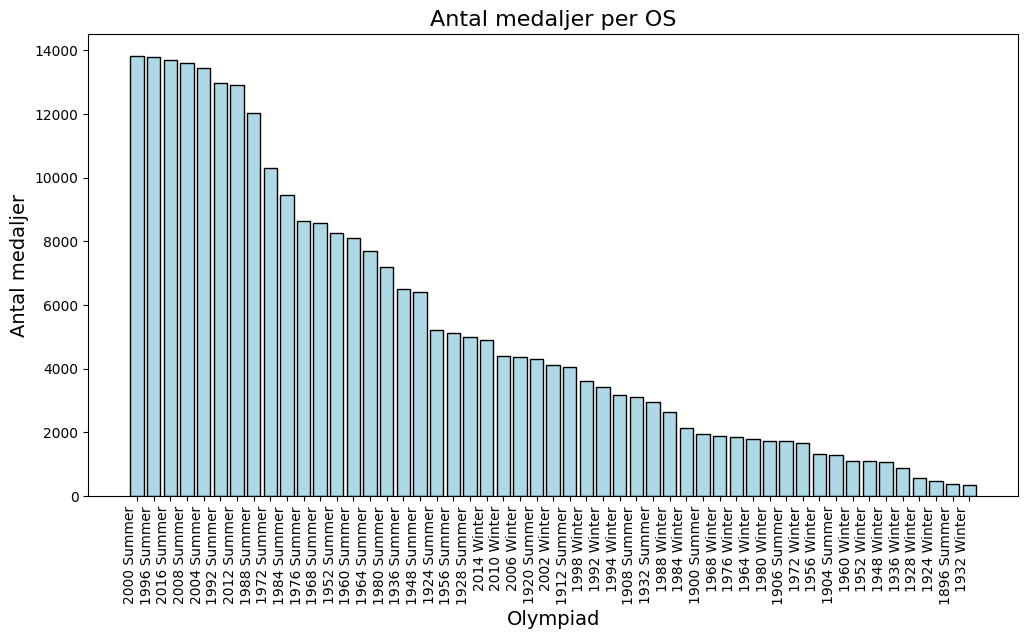

In [14]:
# Räkna antalet medaljer per OS
medals_per_games = os.groupby('Games').size().reset_index(name='Medals')

# Sortera efter antal medaljer
medals_per_games = medals_per_games.sort_values(by='Medals', ascending=False)

# Skapa bar chart för medaljer per OS
plt.figure(figsize=(12, 6))
plt.bar(medals_per_games['Games'], medals_per_games['Medals'], color='lightblue', edgecolor='black')
plt.title('Antal medaljer per OS', fontsize=16)
plt.xlabel('Olympiad', fontsize=14)
plt.ylabel('Antal medaljer', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.show()


#### Medaljtyper per OS

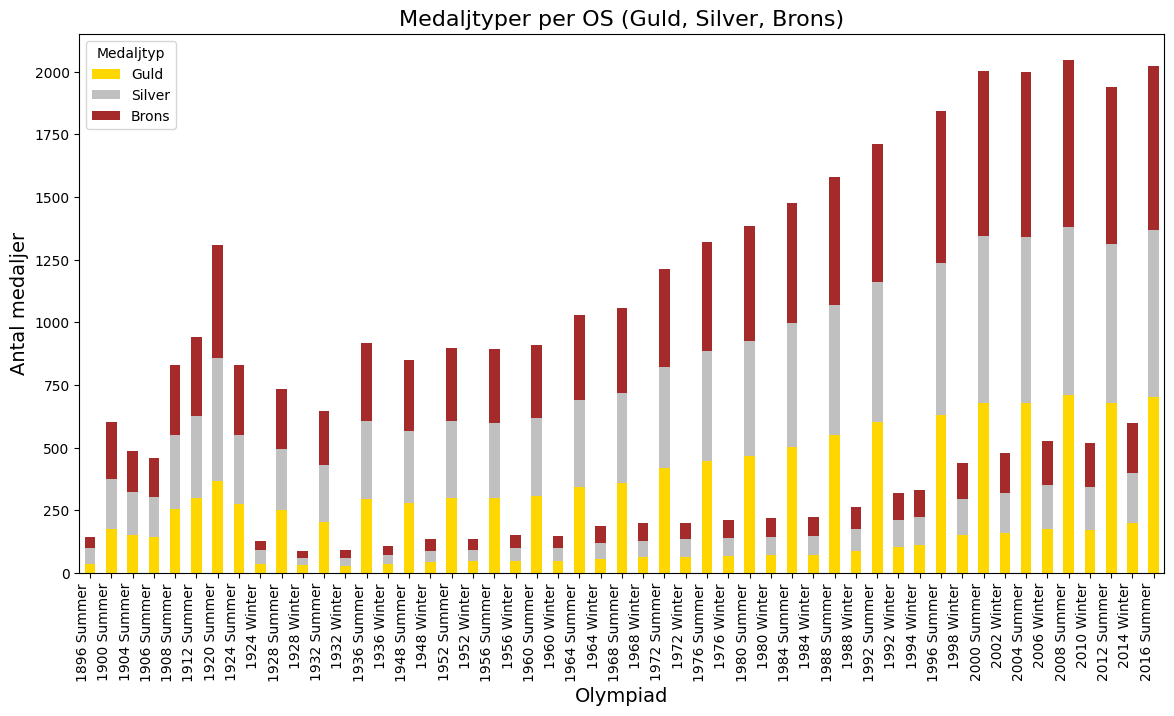

In [15]:

# Gruppera efter OS och medaljtyp, och räkna antalet
medals_by_type_per_game = os.groupby(['Games', 'Medal']).size().unstack().fillna(0)

# Skapa stacked bar chart för medaljtyper per OS
medals_by_type_per_game.plot(kind='bar', stacked=True, color=['gold', 'silver', 'brown'], figsize=(14, 7))

plt.title('Medaljtyper per OS (Guld, Silver, Brons)', fontsize=16)
plt.xlabel('Olympiad', fontsize=14)
plt.ylabel('Antal medaljer', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Medaljtyp', labels=['Guld', 'Silver', 'Brons'])
plt.show()
